## Integrantes del Grupo B
### Integrantes

- [Diego Rios Vasquez](https://github.com/diegoVasquez600)
- [Jonathan Alvarez Arismendi](https://github.com/diegoVasquez600)
- [Hector Enrique Diaz Garcia](https://github.com/diegoVasquez600)


### Ejercicio 2: 
Estudiantes (cd-2024-1-tia4-equipo_b-ejercicio_2)
1. Analizar el problema de los estudiantes en relación al rendimiento en el curso de matemáticas a través de la técnica de Análisis de Componentes Principales (PCA). El Científico de Datos es libre de utilizar todas las técnicas conocidas para realizar un buen análisis de los datos. Nota: Utilice el archivo adicional para la descripción de los datos (columnas): data-estudiantes-info.txt
Data: data-estudiantes.csv

2. Carga de librerias y paquetes

In [1390]:
import numpy   as np
import seaborn as sns
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
print("Librerias Importadas")

Librerias Importadas


### Load File

In [1391]:
dataEstudiantes = pd.read_csv('data-estudiantes.csv', delimiter=";")
# Crear un dataframe con los datos de los estudiantes
dataEstudiantes = pd.DataFrame(dataEstudiantes)
# Contar el numero de filas y columnas
num_rows, num_columns = dataEstudiantes.shape

a. Total de filas y columnas

In [1392]:
print("El numero de Filas es:", num_rows)
print("El numero de Columnas es:", num_columns)

El numero de Filas es: 395
El numero de Columnas es: 33


b. Primeros 20 Registros

In [1393]:
# Mostrar los primeros 20 registros
print(dataEstudiantes.head(20))

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   18       U     GT3       A     4     4   at_home   teacher   
1      GP   F   17       U     GT3       T     1     1   at_home     other   
2      GP   F   15       U     LE3       T     1     1   at_home     other   
3      GP   F   15       U     GT3       T     4     2    health  services   
4      GP   F   16       U     GT3       T     3     3     other     other   
5      GP   M   16       U     LE3       T     4     3  services     other   
6      GP   M   16       U     LE3       T     2     2     other     other   
7      GP   F   17       U     GT3       A     4     4     other   teacher   
8      GP   M   15       U     LE3       A     3     2  services     other   
9      GP   M   15       U     GT3       T     3     4     other     other   
10     GP   F   15       U     GT3       T     4     4   teacher    health   
11     GP   F   15       U     GT3       T     2     1  services

c. Tipos de datos

In [1394]:
# Mostrar Tipos de Datos
dataTypes = dataEstudiantes.dtypes
print("Tipos de Datos: ")
print(dataTypes)

Tipos de Datos: 
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


d. Las columnas a eliminar son las siguientes:
-  sex: No se considerará el género para el análisis del rendimiento en matemáticas debido a que no se espera que el desempeño académico esté relacionado de manera significativa con el sexo del estudiante en este contexto.
- age:  La edad no se tomará en cuenta, ya que no se ha identificado como un factor determinante en el rendimiento académico en el curso de matemáticas. No se espera que la edad tenga una influencia directa en las habilidades o el éxito en esta materia.
- address: El tipo de dirección (urbana o rural) no se relaciona directamente con el rendimiento académico en matemáticas. Se considera que otros factores, como el nivel socioeconómico o la calidad de la educación recibida, pueden ser más relevantes para el análisis.
- famsize: El tamaño de la familia no se incluirá en el análisis debido a que no se espera que tenga una relación directa con el rendimiento en matemáticas. La influencia de la estructura familiar en el desempeño académico puede variar ampliamente y es más compleja que simplemente el tamaño de la familia.
- reason: La razón para elegir la escuela no se considerará relevante para el rendimiento en matemáticas, ya que no se ha establecido una conexión clara entre la elección de la escuela y el éxito en esta materia específica.
- nursery: La asistencia a la escuela infantil no se incluirá en el análisis debido a que no se ha identificado como un factor relevante para el rendimiento en matemáticas en este contexto específico.
- famrel: La calidad de las relaciones familiares no se considerará en este análisis, ya que no se ha establecido una conexión clara entre este factor y el rendimiento académico en matemáticas. Otros aspectos familiares pueden ser más relevantes para explorar en relación con el desempeño estudiantil.
- Walc: El consumo de alcohol durante los fines de semana no se tomará en cuenta debido a que no se espera que tenga una relación directa con el rendimiento académico en el curso de matemáticas. Otros factores de estilo de vida y hábitos de estudio pueden ser más pertinentes para investigar en este análisis.
- traveltime: No se considerará el tiempo de viaje de casa a la escuela en el análisis, ya que, aunque puede afectar la disponibilidad de tiempo para estudiar, no se observa que tenga una relación directa con el rendimiento académico en el curso de matemáticas. Otros factores relacionados con el entorno educativo y los hábitos de estudio pueden ser más relevantes para explorar en este análisis.

In [1395]:
# Eliminacion de columnas del DataFrame
dataEstudiantes = dataEstudiantes.drop(['sex', 'age', 'freetime', 'address', 'Walc', 'famsize', 'reason',  'nursery', 'famrel', 'traveltime', 'G1', 'G2', 'health', 'higher', 'school','Mjob', 'Fjob', 'Pstatus', 'guardian', 'schoolsup', 'absences', 'activities', 'famsup'], axis=1)
# Remove the null values
dataEstudiantes = dataEstudiantes.dropna()
# Volver a contar filas y columnas
num_rows, num_columns = dataEstudiantes.shape
# Imprimir el numero de filas y columnas
print(f'El numero de filas es: {num_rows}')
print(f'El numero de columnas es: {num_columns}')



El numero de filas es: 395
El numero de columnas es: 10


e. Categorizar columnas si es necesario (transformar datos nominales en números). Nota: Esto se debe hacer antes de normalizar los datos. Por ejemplo: “One-Hot Encoding”

In [1396]:

categorical_columns = dataEstudiantes.select_dtypes(include=['object']).columns
encoded_data = pd.get_dummies(dataEstudiantes[categorical_columns])
dataEstudiantes = dataEstudiantes.drop(categorical_columns, axis=1)
dataEstudiantes = pd.concat([dataEstudiantes, encoded_data], axis=1)
print(dataEstudiantes)


     Medu  Fedu  studytime  failures  goout  Dalc  G3  paid_no  paid_yes  \
0       4     4          2         0      4     1   6     True     False   
1       1     1          2         0      3     1   6     True     False   
2       1     1          2         3      2     2  10    False      True   
3       4     2          3         0      2     1  15    False      True   
4       3     3          2         0      2     1  10    False      True   
..    ...   ...        ...       ...    ...   ...  ..      ...       ...   
390     2     2          2         2      4     4   9    False      True   
391     3     1          1         0      5     3  16     True     False   
392     1     1          1         3      3     3   7     True     False   
393     3     2          1         0      1     3  10     True     False   
394     1     1          1         0      3     3   9     True     False   

     internet_no  internet_yes  romantic_no  romantic_yes  
0           True         Fa

5. Normalizar/Estandarizar los datos.

In [1397]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(dataEstudiantes)
dataEstudiantes = pd.DataFrame(x_scaler, columns=dataEstudiantes.columns)

# Realizar PCA
pca = PCA()

x_pca = pca.fit_transform(dataEstudiantes)
print(x_pca)

[[ 1.94909428e+00 -1.51022779e+00  3.07630389e-01 ... -3.19493503e-16
  -2.47999462e-17 -1.18990567e-16]
 [ 1.53895055e+00 -2.71198825e-01 -9.17327804e-01 ... -2.46842289e-15
   1.55633394e-16 -1.07042987e-17]
 [ 7.47231918e-01  5.37404600e-02  7.05061146e-01 ... -3.20959431e-16
  -4.54966020e-16  7.41682921e-18]
 ...
 [ 4.83973923e+00 -1.54020444e-01  7.05953027e-01 ...  7.93199963e-17
   9.42737134e-17 -1.93996974e-18]
 [ 6.72004284e-01 -5.67713190e-01 -1.57325121e+00 ...  5.68715382e-17
   1.05499183e-16  2.93637824e-17]
 [ 1.56586912e+00 -1.91924850e-01 -1.36059544e+00 ...  4.94090438e-17
  -5.15541652e-17  6.86423577e-17]]


6.	Obtener los autovectores y autovalores.

In [1398]:
data = np.array(dataEstudiantes)

# Computar eigenvalues y eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(np.cov(data))
# Real eigenvalues y eigenvectors
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

7. Obtener las siguientes matrices (Explicar la información contenida brevemente en cada una):


a.	Matriz de covarianza. 

In [1399]:
data = pd.DataFrame(data)
matiz_covarianza = data.cov()

print(matiz_covarianza)
# sns.heatmap(matiz_covarianza, annot=False, cmap='coolwarm')
# plt.show()

          0         1         2         3         4         5         6   \
0   1.002538  0.625037  0.065109 -0.237281  0.064257  0.019884  0.217699   
1   0.625037  1.002538 -0.009198 -0.251044  0.043214  0.002392  0.152844   
2   0.065109 -0.009198  1.002538 -0.174004 -0.064066 -0.196517  0.098068   
3  -0.237281 -0.251044 -0.174004  1.002538  0.124877  0.136392 -0.361330   
4   0.064257  0.043214 -0.064066  0.124877  1.002538  0.267671 -0.133129   
5   0.019884  0.002392 -0.196517  0.136392  0.267671  1.002538 -0.054799   
6   0.217699  0.152844  0.098068 -0.361330 -0.133129 -0.054799  1.002538   
7  -0.160106 -0.087202 -0.167644  0.188516 -0.010520 -0.062624 -0.102255   
8   0.160106  0.087202  0.167644 -0.188516  0.010520  0.062624  0.102255   
9  -0.201975 -0.127830 -0.059573  0.063612 -0.074558 -0.036302 -0.098733   
10  0.201975  0.127830  0.059573 -0.063612  0.074558  0.036302  0.098733   
11 -0.039781 -0.015642 -0.053420 -0.093373 -0.007890 -0.015159  0.130300   
12  0.039781

b.	Matriz de correlación

Matriz de Correlacion
          0         1         2         3         4         5         6   \
0   1.000000  0.623455  0.064944 -0.236680  0.064094  0.019834  0.217147   
1   0.623455  1.000000 -0.009175 -0.250408  0.043105  0.002386  0.152457   
2   0.064944 -0.009175  1.000000 -0.173563 -0.063904 -0.196019  0.097820   
3  -0.236680 -0.250408 -0.173563  1.000000  0.124561  0.136047 -0.360415   
4   0.064094  0.043105 -0.063904  0.124561  1.000000  0.266994 -0.132791   
5   0.019834  0.002386 -0.196019  0.136047  0.266994  1.000000 -0.054660   
6   0.217147  0.152457  0.097820 -0.360415 -0.132791 -0.054660  1.000000   
7  -0.159700 -0.086981 -0.167220  0.188039 -0.010493 -0.062465 -0.101996   
8   0.159700  0.086981  0.167220 -0.188039  0.010493  0.062465  0.101996   
9  -0.201463 -0.127507 -0.059422  0.063451 -0.074370 -0.036210 -0.098483   
10  0.201463  0.127507  0.059422 -0.063451  0.074370  0.036210  0.098483   
11 -0.039681 -0.015602 -0.053285 -0.093137 -0.007870 -0.015121  0.

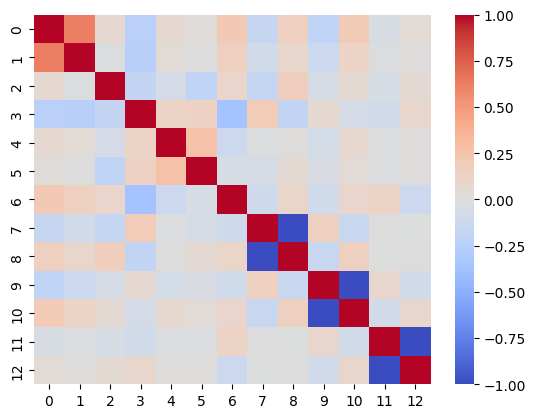

In [1400]:
matiz_correlacion = data.corr()

print("Matriz de Correlacion")
print(matiz_correlacion)

sns.heatmap(matiz_correlacion, annot=False, cmap='coolwarm')
plt.show()

c.	Matriz de autovectores

In [1401]:
print("Eigenvectors:")
print(eigenvectors)


Eigenvectors:
[[-6.75205328e-02 -5.35359973e-02  2.95044502e-02 ...  2.90587333e-03
  -2.46134814e-11 -1.67451475e-11]
 [-3.71826183e-02 -8.94703777e-03 -4.69688479e-02 ... -2.63228157e-03
   3.28421608e-03  2.23458071e-03]
 [-1.99440078e-02  2.09080620e-03  1.81494543e-02 ... -4.92564945e-03
  -4.46517842e-03 -3.03810751e-03]
 ...
 [-1.54160793e-01 -7.41493943e-03  3.84813585e-02 ...  1.25398810e-02
  -2.88593942e-02 -1.96359326e-02]
 [-1.78652310e-02 -1.96747625e-02 -6.32881363e-02 ... -4.09332139e-03
   3.81825564e-02  2.59794124e-02]
 [-4.33624930e-02 -6.80701218e-03 -5.79470819e-02 ...  1.16610870e-02
   3.91495981e-02  2.66373876e-02]]


d.	Matriz de autovalores

In [1402]:

print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[ 8.67171748e+01  7.03073070e+01  5.57437616e+01  5.25777904e+01
  4.13642598e+01  2.97504030e+01  2.67317096e+01  2.09996502e+01
  1.32872524e+01  1.10153637e+01 -4.68813072e-15 -4.68813072e-15
  3.08133750e-15  3.08133750e-15  4.60798179e-15  4.25186700e-15
  4.25186700e-15  3.60860882e-15  3.60860882e-15 -4.60721234e-15
  1.52555390e-15  1.52555390e-15  3.38351127e-16  3.38351127e-16
 -3.76285617e-15 -3.76285617e-15 -9.44059257e-16 -9.44059257e-16
 -1.79617352e-15 -1.79617352e-15  2.04033313e-15  2.04033313e-15
 -2.85079780e-15 -2.85079780e-15 -2.54534237e-15 -2.54534237e-15
 -2.28681223e-15 -2.28681223e-15 -2.75047934e-15 -2.63369968e-15
 -2.63369968e-15  2.65072263e-15  2.15900727e-15  2.15900727e-15
  2.16771963e-15  2.16771963e-15 -4.25204024e-16 -4.25204024e-16
  3.89788582e-16  3.89788582e-16 -1.70366762e-15 -1.70366762e-15
 -2.20981287e-15 -1.25735702e-15 -1.25735702e-15 -2.04672071e-15
 -2.04672071e-15 -2.00030496e-15 -2.00030496e-15 -1.81357107e-15
 -1.81357107

8. Seleccionar los autovectores correspondientes a las componentes principales

In [1403]:
autovectores = pca.components_
autovalores = pca.explained_variance_
print("Autovectores")
print(autovectores)
print("Autovalores")
print(autovalores)

indices_ord = np.argsort(autovalores)[::-1]
autovectores_ordenados = autovectores[indices_ord]
autovalores_ordenados = autovalores[indices_ord]

# Selecciona los autovectores correspondientes a las componentes principales
num_componentes_principales = 2
autovectores_principales = autovectores_ordenados[:num_componentes_principales]

print("Auto Vectores Principales")
print(autovectores_principales)

Autovectores
[[-3.42312115e-01 -2.80746581e-01 -1.58549866e-01  2.57021597e-01
  -2.05884887e-02 -1.02382823e-02 -2.12346798e-01  4.11375145e-01
  -4.11375145e-01  3.99705091e-01 -3.99705091e-01  6.78174121e-02
  -6.78174121e-02]
 [-4.36608471e-02 -6.13947882e-02 -3.49270169e-02  2.41734363e-01
   1.03988559e-01  8.66231625e-02 -2.39671478e-01  1.11064487e-01
  -1.11064487e-01 -1.94601314e-01  1.94601314e-01 -6.15832533e-01
   6.15832533e-01]
 [-1.55898751e-01 -1.72152203e-01  2.03883074e-01 -5.25080624e-02
  -1.36217524e-01 -7.01502556e-02 -6.45353080e-02 -4.60196021e-01
   4.60196021e-01  4.19767846e-01 -4.19767846e-01 -2.21497033e-01
   2.21497033e-01]
 [ 3.16989878e-01  3.57072360e-01  1.58902116e-01 -3.39144635e-01
  -3.01397661e-01 -3.50134323e-01  2.75059296e-01  2.82233557e-01
  -2.82233557e-01  2.09177020e-01 -2.09177020e-01 -2.18899472e-01
   2.18899472e-01]
 [ 3.89887148e-01  4.34632208e-01 -3.24033935e-01  6.11643847e-02
   4.14855343e-01  4.56873746e-01 -8.89969622e-02 -4.

9.	Proyectar el dataset original sobre el nuevo espacio de dimensión < 4

In [1404]:
projected_data = np.dot(dataEstudiantes, autovalores_ordenados)

print("Projected data:")
print(projected_data)

Projected data:
[  5.8904461   -9.75608891  -2.86595434   2.10891048  -0.45687835
   2.03665601  -3.06234061   5.8904461   -1.66786101   0.24384579
   4.1172747   -5.32154579   3.03415759   2.5305695   -2.58315546
   4.41526144   7.11986702  -0.33747809   5.00997832   0.29576727
   0.89435268   1.96440153  -0.88430003  -1.83879796  -0.29693543
  -4.00927653  -7.74800276   1.57820336   2.11886314  11.15095742
   5.49460393   3.24884796   2.34800379  -0.92149316  -3.21680222
  -6.91153334   6.03645713   7.4312148    2.780614    -7.65790118
  -2.1667598    3.80125794   5.96420265  -8.89030608  -1.51905972
   0.30912831   2.67167007   7.2015033    3.13531708   7.2717679
  -3.02795429   0.94386431   6.15635924   4.75161374   2.72639194
  -5.34428863   2.03665601   5.09456662  -8.47134969   1.63910714
   7.88177883  -4.18941833  -7.20964611   6.48282789   4.75132096
   3.41775985  13.02460746  -0.78636602  -5.01928703   1.02240101
  -0.32054191   4.57313143  -3.34016892  -4.52214805   1.0604

10. Elaborar los sigueintes graficos:

a.  Grafico de Codo

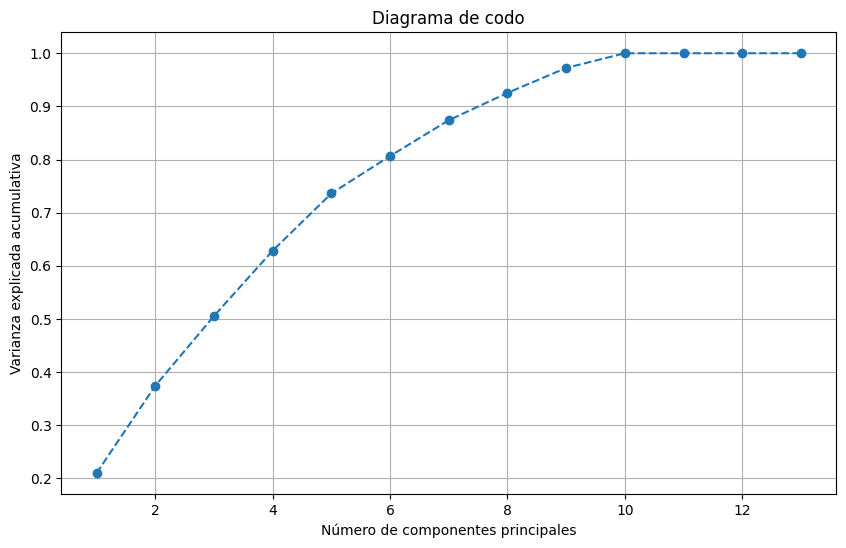

In [1405]:
# Graficamos el Diagrama de Codo
explained_variance_ratio      = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# Calcular la varianza explicada acumulativa y el porcentaje de varianza explicada
#cumulative_explained_variance = np.cumsum(explained_variance_ratio) * 100 # Porcentaje
numero_componentes            = len(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, numero_componentes + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Diagrama de codo')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.grid()
plt.show()

Diagrama de Codo y Porcentaje

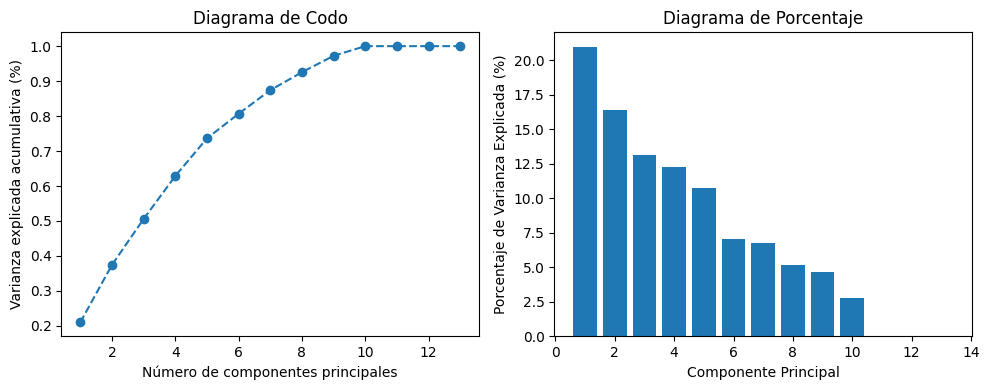

In [1406]:
# Crear el diagrama de codo
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa (%)')
plt.title('Diagrama de Codo')

# Crear el diagrama de porcentaje
plt.subplot(1, 2, 2)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100)
plt.xlabel('Componente Principal')
plt.ylabel('Porcentaje de Varianza Explicada (%)')
plt.title('Diagrama de Porcentaje')
plt.tight_layout()

plt.show()

              Medu  Fedu  studytime  failures  goout  Dalc    G3  paid_no  \
Medu          1.00  0.62       0.06     -0.24   0.06  0.02  0.22    -0.16   
Fedu          0.62  1.00      -0.01     -0.25   0.04  0.00  0.15    -0.09   
studytime     0.06 -0.01       1.00     -0.17  -0.06 -0.20  0.10    -0.17   
failures     -0.24 -0.25      -0.17      1.00   0.12  0.14 -0.36     0.19   
goout         0.06  0.04      -0.06      0.12   1.00  0.27 -0.13    -0.01   
Dalc          0.02  0.00      -0.20      0.14   0.27  1.00 -0.05    -0.06   
G3            0.22  0.15       0.10     -0.36  -0.13 -0.05  1.00    -0.10   
paid_no      -0.16 -0.09      -0.17      0.19  -0.01 -0.06 -0.10     1.00   
paid_yes      0.16  0.09       0.17     -0.19   0.01  0.06  0.10    -1.00   
internet_no  -0.20 -0.13      -0.06      0.06  -0.07 -0.04 -0.10     0.15   
internet_yes  0.20  0.13       0.06     -0.06   0.07  0.04  0.10    -0.15   
romantic_no  -0.04 -0.02      -0.05     -0.09  -0.01 -0.02  0.13     0.01   

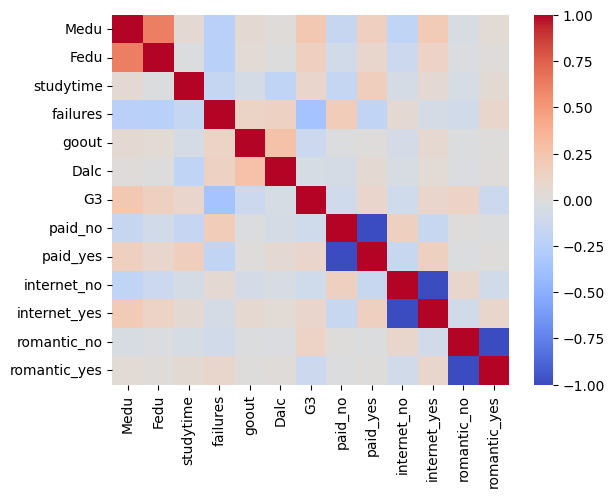

In [1407]:
# Compare each column in dataEstudiantes and print the correlation with the 'G3' column and show the correlation matrix and make a heatmap and scatter
# for column in dataEstudiantes.columns:
#     print(f'Correlacion de {column} con G3: {dataEstudiantes[column].corr(dataEstudiantes["G3"])}')

#     plt.scatter(x=dataEstudiantes[column], y=dataEstudiantes['G3'])
#     plt.xlabel('G3')
#     plt.ylabel(column)
#     plt.show()

# Show the correlation matrix and make a heatmap
corr_matrix = dataEstudiantes.corr().round(2)
print(corr_matrix)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()